# Worksheet 24

Name:  
UID: 

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

/Users/priscilla-nguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


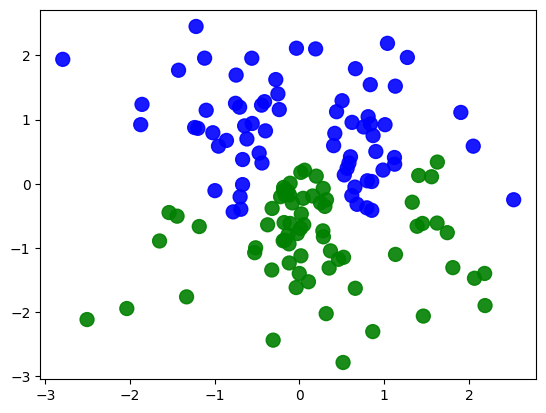

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6352
Epoch 2/200
3/3 [==============================] - 0s 947us/step - loss: 0.6330
Epoch 3/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6313
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6301
Epoch 5/200
3/3 [==============================] - 0s 918us/step - loss: 0.6288
Epoch 6/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6277
Epoch 7/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6266
Epoch 8/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6256
Epoch 9/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6246
Epoch 10/200
3/3 [==============================] - 0s 867us/step - loss: 0.6236
Epoch 11/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6225
Epoch 12/200
3/3 [==============================] - 0s 875us/step - loss: 0.6216
Epoch 13/200
3/3 [==============================] - 0

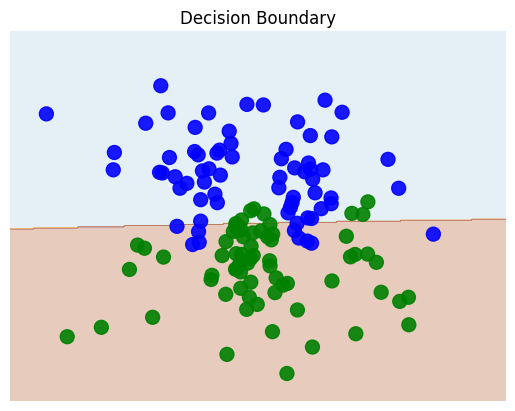

In [11]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

In [10]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 208.8 MB 29.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 25.8 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 20.6 MB 20.7 MB/s eta 0:00:01
  Using cached protobuf-4.25.1-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     |████████████████████████████████| 1.9 MB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 23.7 MB/s eta 0:00:01
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)